# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [134]:
df = pd.read_csv('Frozen_Dessert_Production.csv',
                 index_col='DATE',
                 parse_dates=True
                )

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [135]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


<AxesSubplot:xlabel='DATE'>

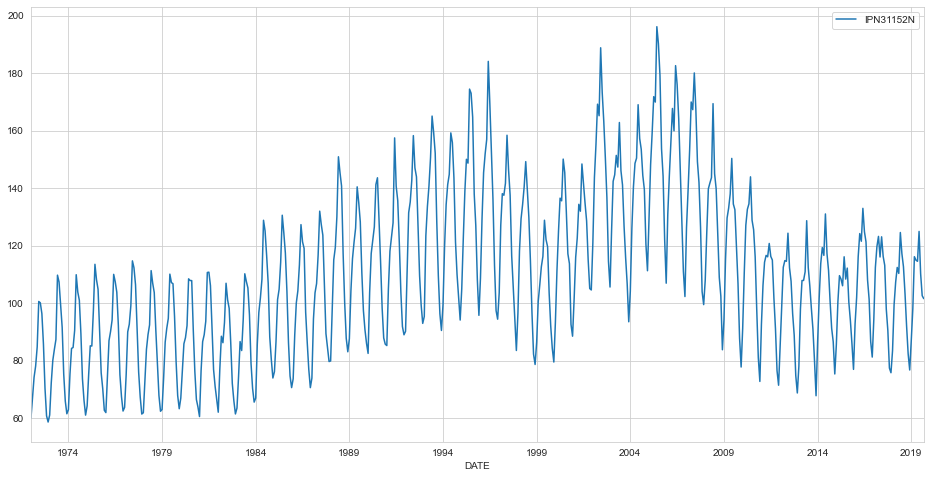

In [137]:
df.plot(figsize=(16,8))

## Preprocessing of Data

### Train Test Split

In [138]:
len(df)

573

In [139]:
len(df)-18

555

In [140]:
test_size = 18

In [141]:
test_ind = len(df)- test_size

In [142]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [143]:
train

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434


In [145]:
test

,IPN31152N
DATE,
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584
2018-07-01,117.222
2018-08-01,112.678
2018-09-01,103.312
2018-10-01,92.132
2018-11-01,82.435
2018-12-01,76.761


### Scaling

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [149]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [150]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [199]:
length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)
print(f'Length of Train Generator:', len(generator))
print(f'Length of Validation Generator', len(validation_generator))

Length of Train Generator: 543
Length of Validation Generator 6


In [209]:
X, y = generator[0]

In [207]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [210]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 6s 8ms/step - loss: 0.0175 - val_loss: 0.0122
Epoch 2/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0068 - val_loss: 0.0014
Epoch 3/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 4/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 5/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 6/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 7/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0036 - val_loss: 0.0059


<AxesSubplot:>

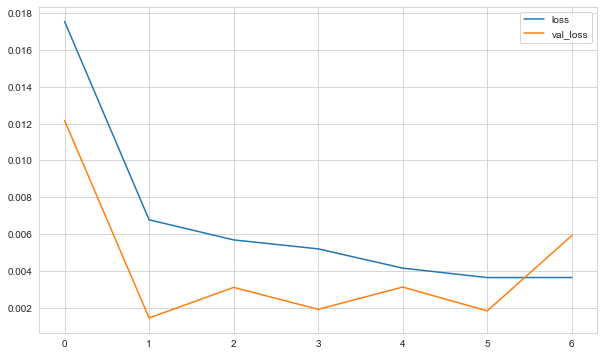

In [211]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Modelling & Model Performance

### Import related libraries

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [213]:
n_features = 1

In [214]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')  

In [215]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### Evaluate on Test Data

In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [217]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [218]:
y_pred = model.predict(validation_generator)

In [219]:
y_pred

array([[0.00686455],
       [0.0052417 ],
       [0.00471163],
       [0.00355483],
       [0.00478825],
       [0.0065218 ]], dtype=float32)

In [223]:
test_scaled[-6:]

array([[0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [224]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: -42.710413545411484 
 mae: 0.37891294435364453 
 mse: 0.14695793523846692 
 rmse: 0.38335092961732453


In [225]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [226]:
eval_metrics(test_scaled, test_predictions)

r2_score: -11.836785137009324 
 mae: 0.33746424761487376 
 mse: 0.12344394629704494 
 rmse: 0.35134590690236445


#### Inverse Transformations and Comparing

In [227]:
true_predictions = scaler.inverse_transform(test_predictions)

In [228]:
test['Predictions'] = true_predictions

In [229]:
test

,IPN31152N,Predictions
DATE,,
2018-04-01,112.431,59.683
2018-05-01,110.354,60.055
2018-06-01,124.584,60.166
2018-07-01,117.222,60.072
2018-08-01,112.678,59.903
2018-09-01,103.312,59.697
2018-10-01,92.132,59.518
2018-11-01,82.435,59.358
2018-12-01,76.761,59.240


<AxesSubplot:xlabel='DATE'>

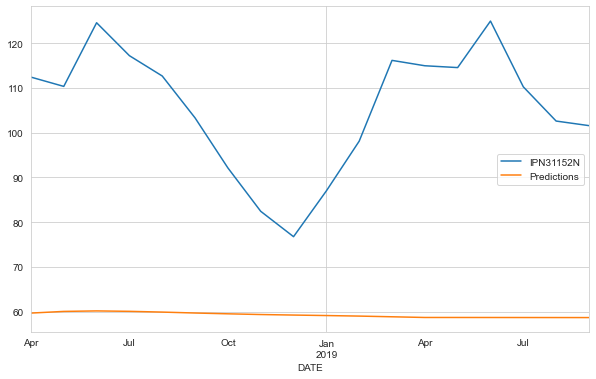

In [230]:
test.plot()

#### Calculation R2 Score and Error Metrics

In [231]:
eval_metrics(test.IPN31152N, test.Predictions)

r2_score: -11.836785137009322 
 mae: 46.406024800086996 
 mse: 2334.333998013832 
 rmse: 48.31494590718106


### with "relu" activation function

In [232]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')  

In [233]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### Evaluate on Test Data

In [234]:
y_pred = model.predict(validation_generator)

In [235]:
eval_metrics(test_scaled[-6:], y_pred)

r2_score: -40.668495566043966 
 mae: 0.3696619412000224 
 mse: 0.1400928423273143 
 rmse: 0.3742897838938625


In [236]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [237]:
eval_metrics(test_scaled, test_predictions)

r2_score: -11.999773640496084 
 mae: 0.3399764419503842 
 mse: 0.12501131256957435 
 rmse: 0.3535693886206417


#### Inverse Transformations and Comparing

In [240]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test

,IPN31152N,Predictions
DATE,,
2018-04-01,112.431,60.183
2018-05-01,110.354,59.781
2018-06-01,124.584,59.437
2018-07-01,117.222,59.186
2018-08-01,112.678,59.007
2018-09-01,103.312,58.882
2018-10-01,92.132,58.793
2018-11-01,82.435,58.730
2018-12-01,76.761,58.689


#### Calculation R2 Score and Error Metrics

In [242]:
eval_metrics(test_scaled, test_predictions)

r2_score: -11.999773640496084 
 mae: 0.3399764419503842 
 mse: 0.12501131256957435 
 rmse: 0.3535693886206417


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [243]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [244]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [245]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 8ms/step - loss: 0.0198
Epoch 2/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0072
Epoch 3/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0077
Epoch 4/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0047
Epoch 5/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0047
Epoch 6/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0042
Epoch 7/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0037
Epoch 8/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0036
Epoch 9/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0035
Epoch 10/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0032
Epoch 11/15
561/561 [==============================] - 5s 10ms/step - loss: 0.0033
Epoch 12/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0032
Epoch 13/15
561/561 [===

In [246]:
scaled_full_data.shape

(573, 1)

In [247]:
scaled_full_data[-length:].shape

(12, 1)

In [248]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [249]:
forecast = scaler.inverse_transform(forecast)

In [250]:
forecast

array([[ 90.32311739],
       [ 83.04475905],
       [ 80.02152288],
       [ 86.64873747],
       [ 98.55839482],
       [108.88821386],
       [115.65470077],
       [121.24616674],
       [123.24497362],
       [118.49778065],
       [111.27834877],
       [102.28023843]])

In [251]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [252]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [253]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [254]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [255]:
forecast_df

,Forecast
2019-10-01,90.323
2019-11-01,83.045
2019-12-01,80.022
2020-01-01,86.649
2020-02-01,98.558
2020-03-01,108.888
2020-04-01,115.655
2020-05-01,121.246
2020-06-01,123.245
2020-07-01,118.498


<AxesSubplot:>

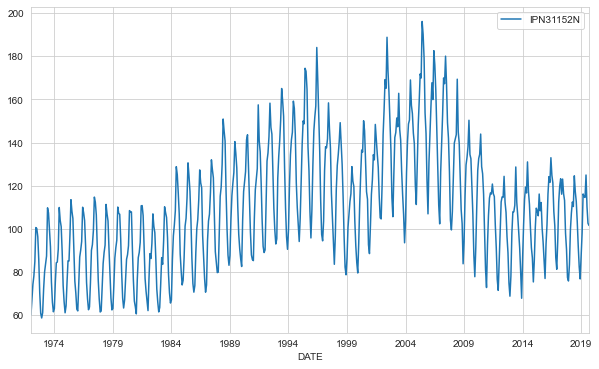

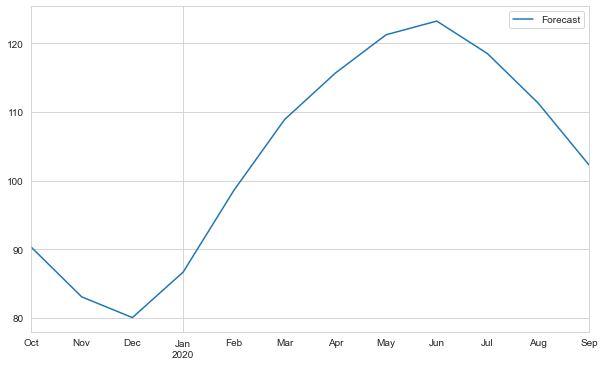

In [256]:
df.plot()
forecast_df.plot()

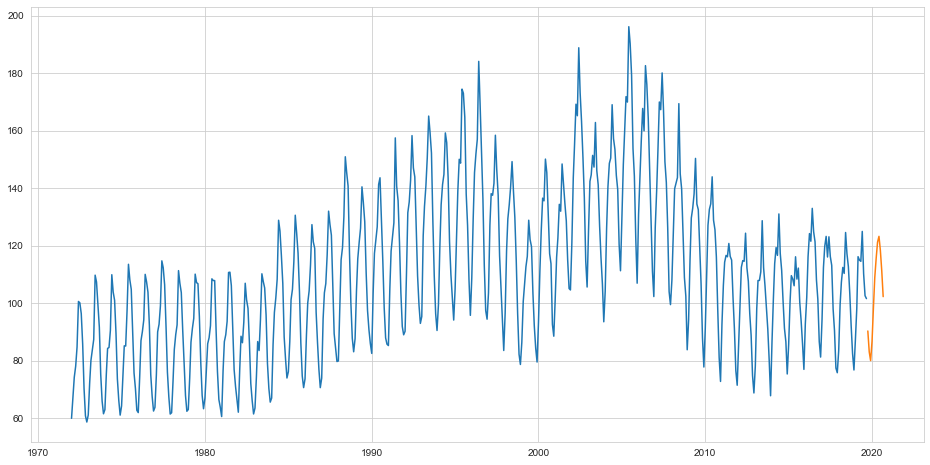

In [257]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['IPN31152N'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

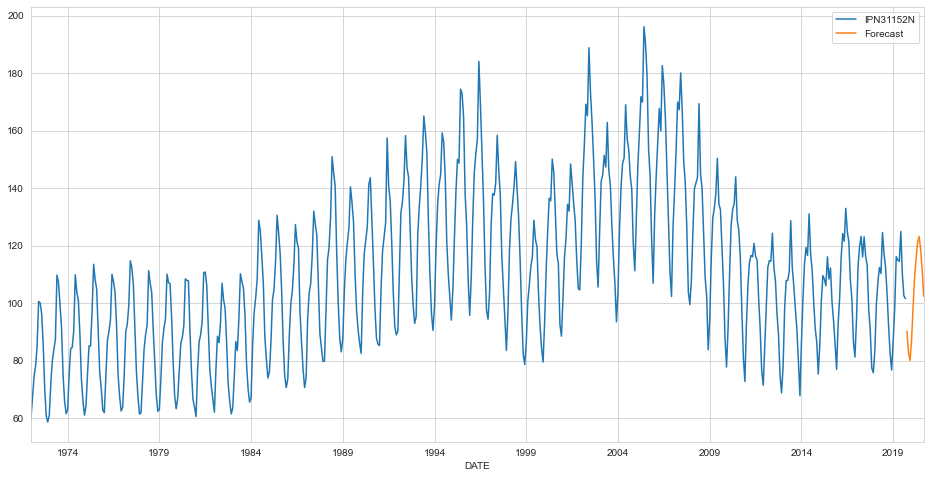

In [258]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

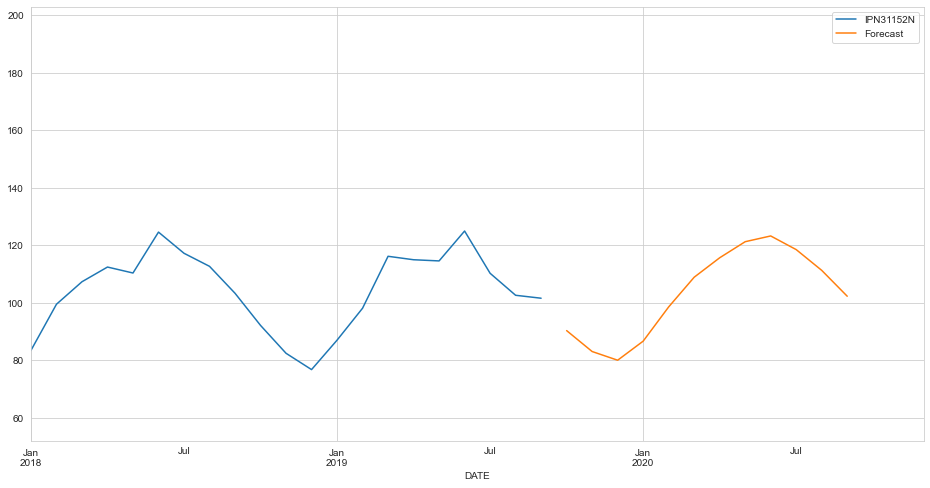

In [260]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')